<b>One can get a NASA API key at https://api.nasa.gov/. Then, save your key as an environment variable called NASA_API_KEY. </b>

In [ ]:
%matplotlib inline

In [ ]:
%%writefile get_nasa_image.py

import argparse
from datetime import datetime
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont, UnidentifiedImageError
import os
import cv2
from google.colab.patches import cv2_imshow
import requests
import os
os.environ['NASA_API_KEY']="place your api key"

def image(
    lat: float, lon: float, date: str = None, 
    dim: float = 0.15
    ) -> Image.Image:
    """
    Parameters:
            lat: latitude (float)
            lon: longitude (float)
            date: date in the yyyy-mm-dd format. Defaults to most recent date (str)
            dim: dimension of the image. Defaults to 0.15 (float)
            info: write onto the image the latitude and the longitude. Defaults to False (bool)
    Returns:
            An Image.Image object
    """
    if not date:
        date = datetime.now().strftime(r'%Y-%m-%d')

    payload = {
        'lat':lat,
        'lon':lon,
        'date':date,
        'dim':dim,
        'api_key':os.environ['NASA_API_KEY'],
    }
    response = requests.get(
        'https://api.nasa.gov/planetary/earth/imagery', 
        params=payload, 
        stream=True,
    )
    img = Image.open(response.raw)

    return img, lat, lon


def main():

    # -------------------- Command-Line Arguments Parsing -------------------- #
    parser = argparse.ArgumentParser(
        description="""
            Retrieves the Landsat 8 image for the supplied location and date
            from the Nasa Earth API.
        """
    )
    parser.add_argument('-lat', '-LAT', type=float, help='Latitude')
    parser.add_argument('-lon', '-LON', type=float, help='Longitude')
    parser.add_argument(
        '--date', '-DATE', nargs='?', type=str, help='Date in yyyy-mm-dd format. Defaults to today'
        )
    parser.add_argument(
        '--dim', '-DIM', nargs='?', default=0.15, type=float, help='Image dimension. Defaults to 0.15'
        )
    parser.add_argument(
        '--info', '-INFO', type=bool, help='Writes lat and lon information onto the image'
        )
    args = parser.parse_args()
    # -------------------- End of Command-Line Arguments Parsing -------------------- #
    try:
        img, lat, lon = image(
            args.lat, args.lon, args.date, args.dim
        )
        ttext = f'LAT {lat}  LON {lon}'
        img.save(ttext+".jpg")
        img_nasa = cv2.imread(ttext+".jpg")
        if args.info==True:
          img_nasa = cv2.putText(img_nasa, ttext, (50,80), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 5)
        
        img_nasa = cv2.resize(img_nasa, (400,400))
        cv2_imshow(img_nasa)
    except UnidentifiedImageError:
        print('Could not fetch image. Try adjusting the parameters.')


if __name__ == '__main__':
    main()


Writing get_nasa_image.py


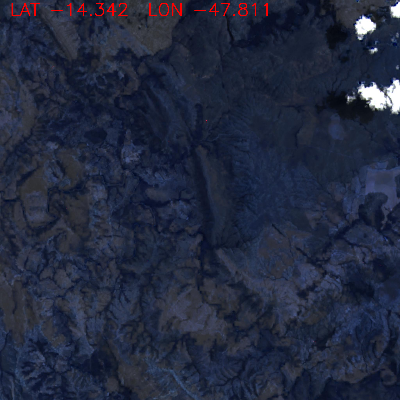

In [ ]:
%run get_nasa_image.py -LAT -14.342 -LON -47.811 -INFO True

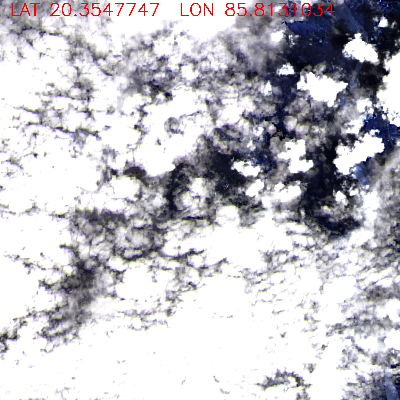

In [ ]:
%run get_nasa_image.py -LAT 20.3547747 -LON 85.8131034 -INFO True